In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_model.csv')

In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,2,0,0,0,0,0,0.0,1,1,1,0.758426,-0.278080,0.286083
1,0,1,0,2,1,0,0,0,0,0,2,0.0,1,2,1,1.613592,-0.873018,0.213067
2,0,1,0,1,0,0,2,0,0,0,2,0.0,1,0,1,-0.911184,0.692433,-0.646863
3,1,1,0,0,1,2,0,0,0,0,0,0.0,1,0,1,-0.829739,-1.486236,-0.888808
4,0,0,0,1,0,0,0,0,0,0,0,0.0,1,3,1,0.391927,0.057611,0.212957


In [4]:
X = df.drop(['Churn'],axis = 1)
y = df.loc[:,'Churn']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
ada = AdaBoostClassifier()

In [9]:
params = {'n_estimators':range(1,250)}

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
search = RandomizedSearchCV(ada,params,cv = 10)

In [12]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': range(1, 250)})

In [13]:
search.best_estimator_

AdaBoostClassifier(n_estimators=206)

In [14]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth = None)
ada2 = AdaBoostClassifier(dtree,n_estimators=222)

In [15]:
model_ada = ada2.fit(X_train,y_train)

In [16]:
y_pred = ada2.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

In [18]:
accuracy_score(y_test,y_pred)

0.8670855485741904

In [19]:
print(confusion_matrix(y_test,y_pred))

[[797 213]
 [ 62 997]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1010
           1       0.82      0.94      0.88      1059

    accuracy                           0.87      2069
   macro avg       0.88      0.87      0.87      2069
weighted avg       0.87      0.87      0.87      2069



In [21]:
y_pred_prob = model_ada.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.8652815564842603

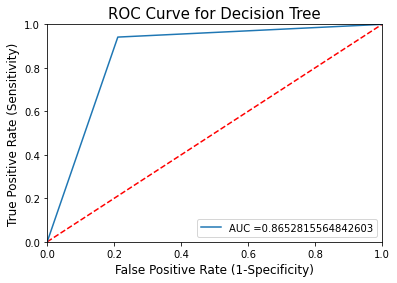

In [24]:
plt.title('ROC Curve for Decision Tree',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [23]:
roc_auc_score(y_test,y_pred)

0.8652815564842603